# Machine Learning in spectroscopy

This notebook presents the data that you will be using for the different projects. In this laboratory we are trying to predict different aerosols' concentration from absorption spectra. These spectra represent the infrared light absorption between $4000 [cm^{-1}]$ and $400 [cm^{-1}]$.

The aerosolos are collected on polytetrafluoroethylene (PTFE) filters (i.e. commonly known as Teflon) and the spectra are obtained through the Fourier Transorm InfraRed (FTIR) spectroscopy technique.

During this project, you will be using the IMPROVE 2015 dataset. IMPROVE is a network of monitoring stations collecting information about atmospheric aerosols all over the United-States but mostly in rural areas. 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data

There are three files containing different information. The first, `IMPROVE-2015_spectra.csv`, contains FTIR absorption spectra of Teflon filters taken at different locations. The second, `IMPROVE-2015_measures.csv`, contains the measures of different species.
The last one contains the usage of a site, if it has been used for training or testing purposes.

In [5]:
filename_measures = 'data/IMPROVE_2015_measures_cs433.csv'
filename_spectra = 'data/IMPROVE_2015_raw_spectra_cs433.csv'
filename_tts = 'data/IMPROVE_2015_train_test_split_cs433.csv'
filename_sec_deriv = 'data/IMPROVE_2015_2nd-derivative_spectra_cs433.csv'

df_meas = pd.read_csv(filename_measures)
df_spec = pd.read_csv(filename_spectra)
df_tts = pd.read_csv(filename_tts)
df_sec_deriv = pd.read_csv(filename_sec_deriv, index_col=0)

In [3]:
df_spec.head()

,wavenumber,ACAD1_01_06_2015_NM_0_csv,ACAD1_01_09_2015_NM_0_csv,ACAD1_01_12_2015_NM_0_csv,ACAD1_01_15_2015_NM_0_csv,ACAD1_01_18_2015_NM_0_csv,ACAD1_01_21_2015_NM_0_csv,ACAD1_01_24_2015_NM_0_csv,ACAD1_01_27_2015_NM_0_csv,ACAD1_01_30_2015_NM_0_csv,...,YOSE1_07_02_2015_FB_0_csv,YOSEX_01_15_2015_FB_0_csv,YOSEX_02_05_2015_FB_0_csv,YOSEX_05_21_2015_FB_0_csv,YOSEX_06_11_2015_FB_0_csv,YOSEX_09_03_2015_FB_0_csv,YOSEX_10_15_2015_FB_0_csv,YOSEX_11_05_2015_FB_0_csv,ZICA1_08_13_2015_FB_0_csv,ZICA1_09_03_2015_FB_0_csv
0,3998.423206,0.35778,0.58858,0.55091,0.49739,0.46597,0.42318,0.41571,0.34475,0.62313,...,0.24296,0.29209,0.40211,0.63614,0.54269,0.67122,0.53922,0.64828,0.40594,0.52207
1,3997.137539,0.35760,0.58832,0.55055,0.49715,0.46570,0.42296,0.41546,0.34452,0.62289,...,0.24282,0.29193,0.40188,0.63588,0.54250,0.67098,0.53898,0.64796,0.40579,0.52184
2,3995.851872,0.35743,0.58806,0.55019,0.49690,0.46543,0.42273,0.41520,0.34430,0.62265,...,0.24269,0.29177,0.40166,0.63563,0.54231,0.67074,0.53873,0.64762,0.40565,0.52161
3,3994.566206,0.35725,0.58781,0.54984,0.49665,0.46516,0.42250,0.41493,0.34407,0.62240,...,0.24255,0.29161,0.40143,0.63538,0.54213,0.67051,0.53848,0.64729,0.40550,0.52138
4,3993.280539,0.35708,0.58756,0.54948,0.49640,0.46489,0.42227,0.41466,0.34384,0.62215,...,0.24241,0.29145,0.40120,0.63512,0.54196,0.67027,0.53823,0.64696,0.40535,0.52114


Each sample is represented by 2784 wavenumber. The sites have a flag at the end of their name, here are their description:

- NM: Normal sample – this corresponds to ambient samples whose data (flow, mass, etc… ) have been validated and no abnormalities have been noticed (bulk of the data)
- FB: Field blanks samples
- QD: Questionable Data – those are samples which were flagged during the validation stage as potential bad samples. If QD samples made it to the FTIR lab, however, it usually means that the validation group changed the flag status from QD to NM after careful consideration. In summary, you can use those samples in your model (no issues observed so far).
- QC: Quality Control – Unlike previous flags, this one is specific to our group (FT-IR). QC samples are a group of 10 randomly picked ambient samples measured on a single instrument that were re-run on another spectrometer to provide inter-instrument comparison as part of our weekly quality control procedure. Considering that our instruments show little spectral dissimilarities between them, QC samples can almost be seen as duplicates.

The samples present in the dataset correspond to a measures every 3 days in a 24-hour period. If there are some samples missing (i.e. a date when there should be a sample), it means that the measure was not validated.

In [4]:
df_meas.head()

,Unnamed: 0,site,SiteCode,Date,flag,Latitude,Longitude,ECf:Value,ECf:Unc,MF:Value,MF:Unc,OCf:Value,OCf:Unc,SO4f:Value,SO4f:Unc,NO3f:Value,NO3f:Unc,DUSTf:Value,DUSTf:Unc
0,0,CRLA1_04_21_2015_NM_0_csv,CRLA1,20150421,NM,42.8958,-122.1361,1.844414,1.023308,76.541793,2.718720,23.343977,3.196060,6.800987,0.142307,1.642580,0.095802,8.725530,0.758188
1,1,TONT1_05_09_2015_NM_0_csv,TONT1,20150509,NM,33.6548,-111.1068,0.218577,0.203142,23.273289,1.597004,3.774399,0.868154,3.132621,0.075339,2.733602,0.136727,4.686666,0.445060
2,2,BADL1_11_26_2015_NM_0_csv,BADL1,20151126,NM,43.7435,-101.9412,0.057109,0.178062,11.188888,1.473206,1.902453,0.738827,4.275544,0.113381,2.193672,0.136355,1.007311,0.121622
3,3,BRID1_10_27_2015_NM_0_csv,BRID1,20151027,NM,42.9749,-109.7579,0.090872,0.144012,6.564180,1.504830,1.569566,0.834177,0.788829,0.036832,0.556859,0.107056,0.337955,0.107560
4,4,SEQU1_04_03_2015_NM_0_csv,SEQU1,20150403,NM,36.4894,-118.8291,1.623977,0.971745,60.448977,2.306680,16.223032,2.258965,8.185925,0.169281,7.541357,0.309728,8.532945,0.735361


The tasks are to predict different species. The relevant columns for your work are the following:

- SiteCode: site ID
- Date: date of the measure
- TOR OC: `OCf:Value`
- TOR EC: `ECf:Value`
- Dust: `DUSTf:Value`
- Sulfate: `SO4f:Value`
- Nitrate: `NO3f:Value`
- PM2.5: `MF:Value`

They all have an uncertainty value with the suffix `:Unc`.

In [ ]:
df_tts.head()

,Unnamed: 0,site,usage
0,0,CRLA1_04_21_2015_NM_0_csv,calibration
1,1,TONT1_05_09_2015_NM_0_csv,calibration
2,2,BADL1_11_26_2015_NM_0_csv,calibration
3,3,BRID1_10_27_2015_NM_0_csv,calibration
4,4,SEQU1_04_03_2015_NM_0_csv,calibration


<IPython.core.display.Javascript object>


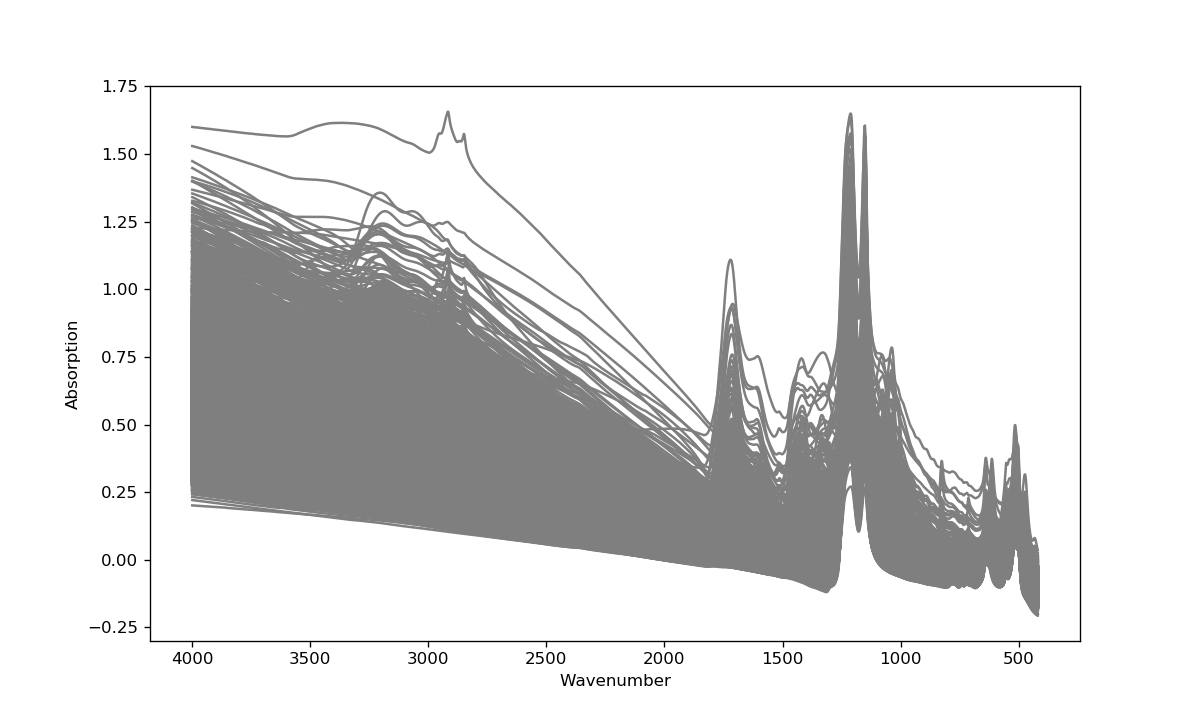

In [11]:
x = df_spec['wavenumber']
y = df_spec.loc[:, df_spec.columns != 'wavenumber']

plt.figure(figsize=(10,6))
plt.plot(x, y, c="tab:gray")
plt.xlabel('Wavenumber')
plt.ylabel('Absorption')
ax = plt.gca()
ax.invert_xaxis()
plt.show()

## Feature processing

### Baseline correction
The main feature processing is baseline correction, in other words, removing the background of the signal. There are two different processes that you could use to remove the baseline: smoothing spline and second derivatives. If you are interested in the techniques themselves, you can read about how we applied smoothing spline in our baseline correction process in the paper "An automated baseline correction protocol for infrared spectra of atmospheric aerosols collected on polytetrafluoroethylene (Teflon) filters" (Kuzmiakova, Dillner, and Takahama, Atmos. Meas. Tech., 2016).

We will provide you the datasets prepared in the case you want to use them in your project.

Here are the options used to produce the datasets:

- **Second derivative**: second-derivative spectra generated with a symmetric, second-order, 21-point Savitsky-Golay filter ("Ambient aerosol composition by infrared spectroscopy and partial least-squares in the chemical speciation network: Organic carbon with functional group identification". Weakly, Takahama, and Dillner, Aeros. Science and Technology. 2016)


In [ ]:
# 2nd derivative data plot
x = df_sec_deriv['wavenumber']
y = df_sec_deriv.iloc[:, df_sec_deriv.columns != 'wavenumber']

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.xlabel('Wavenumber')
plt.ylabel('Absorption')
ax = plt.gca()
ax.invert_xaxis()
plt.show()

### Segmentation
Another feature processing we found useful particulary during baseline correction is segmentation. We split the spectra into three bins: 4000-2000 $[cm^{-1}]$, 2000-1495 $[cm^{-1}]$, and 2000-680 $[cm^{-1}]$. You may also find the segmentation useful.

## Current results

One of our model is Convolutional Neural Network that uses raw spectra as features and predicts different concentrations, here Organic Carbon.

![cnn_res](figures/IMPROVE-2015_CNN_Predictions.png)

## Evaluation

The evaluation will be based on mean error, mean bias, coefficient of determination $r^2$ (i.e. r-squared) and compare against TOR precision. You will have to provide a "cross plot" (prediction vs. reference) and also the normalized residual vs. S/N ratio plot to show there isn't a strong or systematic bias at low concentrations.